# Simple graph using langchain
note: not using any kind of llm over here

**Workflow**
* Nodes -- simple python functions ( performing some tasks)
* Edges -- connect the nodes
* State -- state schema ( means info pass from one node to another and that info hold by state scheme)
* State graph --- structure of the entire graph

In [41]:
# We defined a dictionary shape called State.
# We made two functions (start_play and cricket).
# Each function takes the dictionary, adds some text to "graph_info", and gives it back


from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str
    
def start_play(state:State):
    print("Start play node")
    return{"graph_info":state['graph_info'] + "I am planning to play"}

# start_play({"graph_info": "Hello"})

def cricket(state:State):
    print("My cricket node")    
    return{"graph_info":state['graph_info'] + "cricket"}

def badminton(state:State):
    print("Badminton node is running")
    return{"graph_info":state['graph_info'] + "Badminton"}    

In [42]:
import random
from typing_extensions import Literal

def random_play(state:State)-> Literal['cricket','badminton']:
    graph_info=state['graph_info']
    
    if random.random()>0.5:
        return "cricket"
    else:
        return"badminton"

IPython ek library hai jo Jupyter Notebook me use hoti hai.
Image: images ko show karne ke liye.
display: images ya objects ko output me dikhane ke liye.

→ LangGraph ek tool hai jo nodes aur edges se graphs banata hai.
StateGraph: graph banane ka main object.
START: graph ka starting point.
END: graph ka ending point.


graph = StateGraph(State)
→ yeh ek graph banata hai jo State class ko follow karega.
iska matlab har node input/output me "graph_info" kaam karega.

graph.compile()
→ graph ko “final runnable version” me convert karta hai.
ab graph ready hai chalne ke liye.

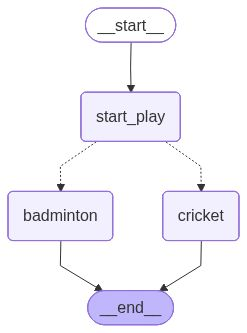

In [43]:

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

#Build Graph
graph=StateGraph(State)
    
    
## Adding the nodes
graph.add_node("start_play",start_play) 
graph.add_node("cricket",cricket)    
graph.add_node("badminton",badminton)

## Schedule the flow of the graph

graph.add_edge(START,"start_play")    
graph.add_conditional_edges("start_play",random_play )
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

## compile the graph
graph_builder=graph.compile()

## view the graph in picture in the form of Notebook.
display(Image(graph_builder.get_graph().draw_mermaid_png()))   

In [45]:
graph_builder.invoke({"graph_info":"hi my name is Musfira"})

Start play node
My cricket node


{'graph_info': 'hi my name is MusfiraI am planning to playcricket'}